<a href="https://colab.research.google.com/github/leilaamani/Machine-learning/blob/main/Regression_by_Gradients_Descent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
battery_df=pd.read_csv('/content/Battery Data02.csv')
battery_df.head(3)

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,1.001205,10/16/2015 09:34:19,1.001206,1,1,0.0,3.434257,0.0,0.0,0.0,0.0,0.000000,0.0,0,0,0
1,2,2.016763,10/16/2015 09:34:20,2.016764,1,1,0.0,3.434418,0.0,0.0,0.0,0.0,0.000032,0.0,0,0,0
2,3,3.032254,10/16/2015 09:34:21,3.032255,1,1,0.0,3.434581,0.0,0.0,0.0,0.0,0.000065,0.0,0,0,0


In [3]:
usage_data=pd.read_csv('/content/Battery Data02.csv',usecols=['Step_Index','Current(A)','Voltage(V)','Voltage(V)',
                                             'Charge_Capacity(Ah)','Discharge_Capacity(Ah)'])
usage_data

,Step_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah)
0,1,0.0,3.434257,0.000000,0.000000
1,1,0.0,3.434418,0.000000,0.000000
2,1,0.0,3.434581,0.000000,0.000000
3,1,0.0,3.434581,0.000000,0.000000
4,1,0.0,3.434257,0.000000,0.000000
...,...,...,...,...,...
27597,12,0.0,4.195723,4.005512,2.009444
27598,12,0.0,4.195885,4.005512,2.009444
27599,12,0.0,4.195885,4.005512,2.009444
27600,12,0.0,4.195885,4.005512,2.009444


In [4]:
charge_step=usage_data[(usage_data['Step_Index']==2)|(usage_data['Step_Index']==3)][['Step_Index','Voltage(V)',
                                                                                     'Charge_Capacity(Ah)']]
charge_step

,Step_Index,Voltage(V),Charge_Capacity(Ah)
60,2,3.582985,0.000282
61,2,3.585740,0.000564
62,2,3.587846,0.000842
63,2,3.589466,0.001124
64,2,3.590924,0.001402
...,...,...,...
11192,3,4.199935,1.996291
11193,3,4.199773,1.996297
11194,3,4.199935,1.996303
11195,3,4.199935,1.996308


In [5]:
# (usage_data['Step_Index']==9)|(usage_data['Step_Index']==10)

In [6]:
x=charge_step.iloc[:10,1]
x

60    3.582985
61    3.585740
62    3.587846
63    3.589466
64    3.590924
65    3.592544
66    3.593840
67    3.594975
68    3.596109
69    3.597243
Name: Voltage(V), dtype: float64

In [7]:
y=charge_step.iloc[:10,2]
y

60    0.000282
61    0.000564
62    0.000842
63    0.001124
64    0.001402
65    0.001684
66    0.001966
67    0.002248
68    0.002526
69    0.002808
Name: Charge_Capacity(Ah), dtype: float64

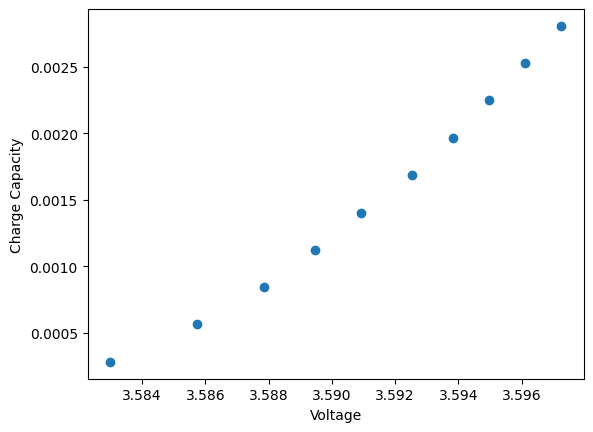

In [8]:
plt.xlabel('Voltage')
plt.ylabel('Charge Capacity')
plt.scatter(x,y);

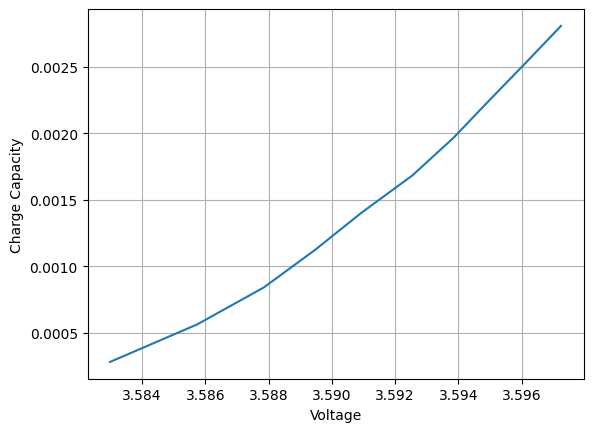

In [9]:
plt.plot(x,y);
plt.xlabel('Voltage')
plt.ylabel('Charge Capacity')
plt.grid()

-0.21635172698384558 0.7785293390400689


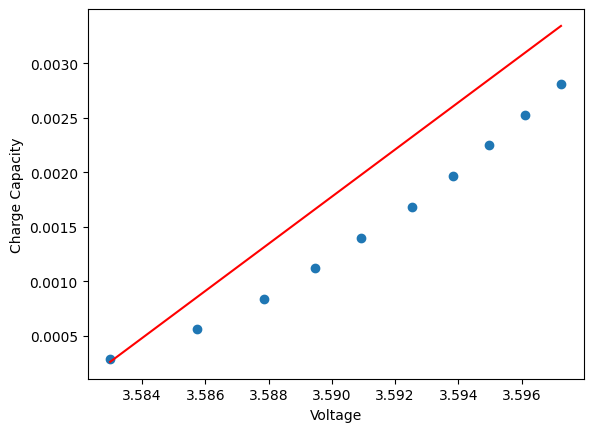

In [10]:
# y=mx+b
m = 8.3
b = 3.15
l =0.0001
epochs = 1000
for i in range(epochs):
    y_predict = m*x+b
    dm = -1*sum(x*(y-y_predict))
    db = -1*sum(y-y_predict)
    m = m-l*dm
    b = b-l*db
print(m,b)
y_predict = m*x+b
plt.xlabel('Voltage')
plt.ylabel('Charge Capacity')
plt.scatter(x,y);
# plt.scatter(x,y_predict);
plt.plot([min(x),max(x)],[min(y_predict), max(y_predict)],color='red');